In [1]:
!pip install seaborn 

In [3]:
!pip install matplotlib


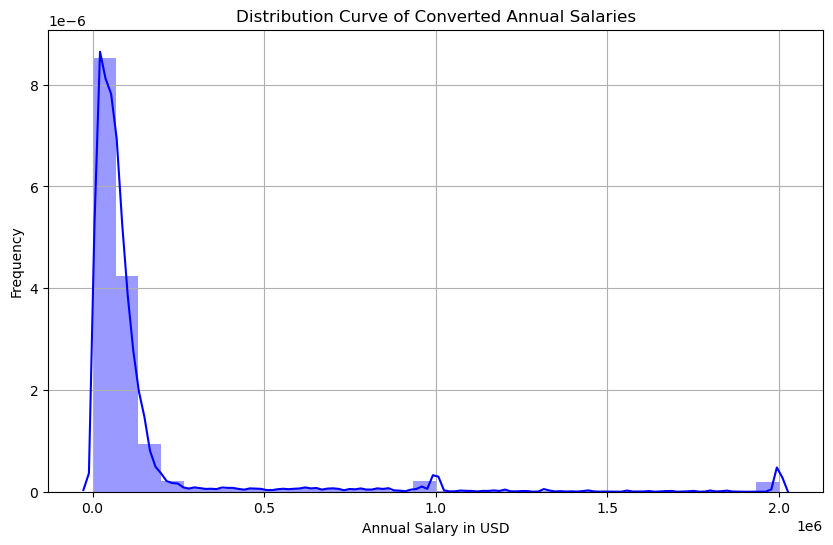

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Load the DataFrame
df = pd.read_csv(file_path)

# Check for missing values in 'ConvertedComp' and drop rows with missing values
df = df.dropna(subset=['ConvertedComp'])

# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], kde=True, bins=30, color='blue')
plt.title('Distribution Curve of Converted Annual Salaries')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

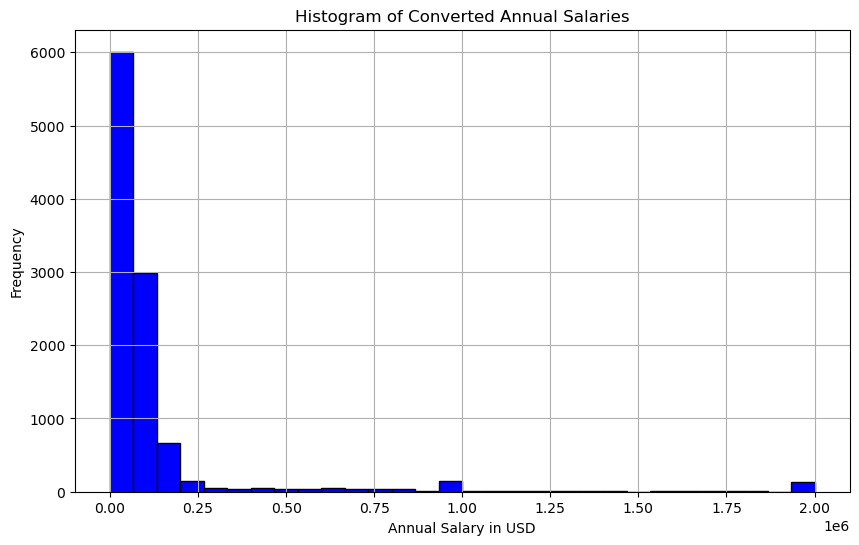

In [6]:


# Plot the histogram for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Converted Annual Salaries')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
median_converted_comp = df['ConvertedComp'].median()

print(median_converted_comp)

57745.0


In [8]:
df = df.dropna(subset=['ConvertedComp', 'Gender', 'Age'])

man_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identified as only Man:", man_count)

median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp for responders identified as only Woman:", median_converted_comp_woman)

age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print("Five number summary for the column Age:")
print("Min:", age_summary['min'])
print("Q1:", age_summary['25%'])
print("Median:", age_summary['50%'])
print("Q3:", age_summary['75%'])
print("Max:", age_summary['max'])

Number of responders identified as only Man: 9515
Median ConvertedComp for responders identified as only Woman: 58000.0
Five number summary for the column Age:
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


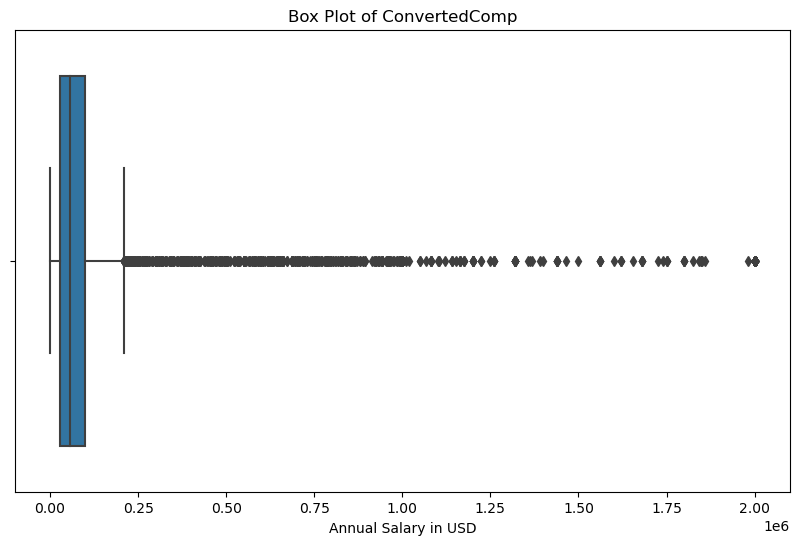

Interquartile Range (IQR) for ConvertedComp: 73192.0
Lower Bound: -82980.0
Upper Bound: 209788.0
Number of outliers in ConvertedComp: 857
Correlation between Age and all other numerical columns:
Respondent      -0.000024
CompTotal        0.006522
ConvertedComp    0.399849
WorkWeekHrs      0.031562
CodeRevHrs      -0.013665
Age              1.000000
Name: Age, dtype: float64


In [9]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Annual Salary in USD')
plt.show()


Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp:", IQR)


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print("Number of outliers in ConvertedComp:", outliers.shape[0])


df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


correlation_matrix = df_no_outliers.corr()
age_correlation = correlation_matrix['Age']
print("Correlation between Age and all other numerical columns:")
print(age_correlation)


In [13]:
median_age = df['ConvertedComp'].median()

print(median_age)

57636.0


In [11]:
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print(median_converted_comp_woman)

58000.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(int(df['Age'].min()), int(df['Age'].max()) + 1, 5), color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

bins = range(int(df['Age'].min()), int(df['Age'].max()) + 5, 5)
age_groups = pd.cut(df['Age'], bins=bins)
age_group_counts = age_groups.value_counts()


most_frequent_age_group = age_group_counts.idxmax()
most_frequent_count = age_group_counts.max()

print(f"The age group with the highest number of survey respondents is {most_frequent_age_group} with {most_frequent_count} respondents.")

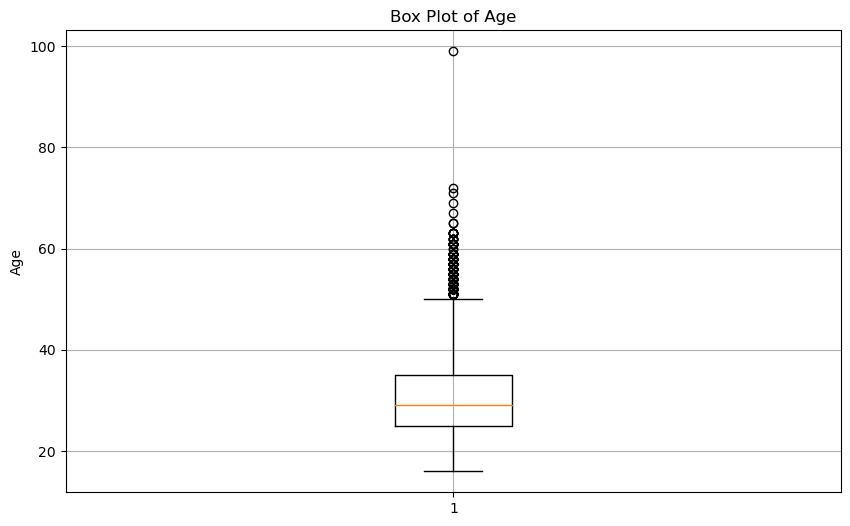

Number of outliers below Q1: 0


In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Calculate Q1 and identify outliers below Q1
Q1 = df['Age'].quantile(0.25)
# Define the lower bound for outliers below Q1
lower_bound = Q1 - 1.5 * (df['Age'].quantile(0.75) - Q1)

# Find outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Count of outliers below Q1
num_outliers_below_Q1 = outliers_below_Q1.shape[0]

print(f"Number of outliers below Q1: {num_outliers_below_Q1}")

In [15]:
correlation_matrix = df.corr()

# Extract the correlations with 'Age'
age_correlation = correlation_matrix['Age']

# Find columns with negative correlation
negative_correlation = age_correlation[age_correlation < 0]

# Print the columns with negative correlation with 'Age'
print("Columns with a negative correlation with 'Age':")
print(negative_correlation)

Columns with a negative correlation with 'Age':
CodeRevHrs   -0.016658
Name: Age, dtype: float64


In [16]:
highest_correlation_column = age_correlation.drop('Age').idxmax()
highest_correlation_value = age_correlation[highest_correlation_column]

print(f"Column with the highest correlation with 'Age': {highest_correlation_column}")
print(f"Correlation value: {highest_correlation_value}")

Column with the highest correlation with 'Age': ConvertedComp
Correlation value: 0.10592119338639697
